# <center>CPE352 Data Science</center>
# <center>Lab Lecture 04 - Textual Data</center>
---

### -เตรียมข้อมูลที่จะใช้ 

In [1]:
import pandas as pd
import numpy as np
import regex as re
import seaborn as sns
import nltk
from textacy.extract.kwic import keyword_in_context
import random
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../Data/un-general-debates-blueprint.csv.gz')

In [4]:
df.head()

,session,year,country,country_name,speaker,position,text
0,25,1970,ALB,Albania,Mr. NAS,NaN,33: May I first convey to our President the co...
1,25,1970,ARG,Argentina,Mr. DE PABLO PARDO,NaN,177.\t : It is a fortunate coincidence that pr...
2,25,1970,AUS,Australia,Mr. McMAHON,NaN,100.\t It is a pleasure for me to extend to y...
3,25,1970,AUT,Austria,Mr. KIRCHSCHLAEGER,NaN,155.\t May I begin by expressing to Ambassado...
4,25,1970,BEL,Belgium,Mr. HARMEL,NaN,"176. No doubt each of us, before coming up to ..."


## 1. Find the top 10 word bigram from UN General Debates of years 1970 - 1990 and compare with those of years 1990 the Latest (remove stopwords first)

In [5]:
def tokenize(text):
    return re.findall(r'[\w-]*\p{L}[\w-]*', text)

In [6]:
stopwords = set(nltk.corpus.stopwords.words('english'))
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

### -เตรียมข้อมูล ngrams  

In [8]:
def ngrams(tokens, n=2, sep=' ', stopwords=stopwords):
    return [sep.join(ngram) for ngram in zip(*[tokens[i:] for i in range(n)])
           if len([t for t in ngram if t in stopwords])==0]

In [9]:
pipeline = [str.lower, tokenize, ngrams]

def prepare(text, pipeline):
    tokens = text
    for transform in pipeline:
        tokens = transform(tokens)
    return tokens

In [10]:
df['tokens_ngrams'] = df['text'].apply(prepare, pipeline=pipeline)

In [11]:
df.head(5)

,session,year,country,country_name,speaker,position,text,tokens_ngrams
0,25,1970,ALB,Albania,Mr. NAS,NaN,33: May I first convey to our President the co...,"[first convey, albanian delegation, twenty-fif..."
1,25,1970,ARG,Argentina,Mr. DE PABLO PARDO,NaN,177.\t : It is a fortunate coincidence that pr...,"[fortunate coincidence, united nations, first ..."
2,25,1970,AUS,Australia,Mr. McMAHON,NaN,100.\t It is a pleasure for me to extend to y...,"[mr president, warmest congratulations, austra..."
3,25,1970,AUT,Austria,Mr. KIRCHSCHLAEGER,NaN,155.\t May I begin by expressing to Ambassado...,"[ambassador hambro, best wishes, general assem..."
4,25,1970,BEL,Belgium,Mr. HARMEL,NaN,"176. No doubt each of us, before coming up to ...","[rostrum wonders, speech must, still speak, mo..."


    จะได้ Column ใหม่ที่ชื่อว่า tokens_ngrams ขึ้นมา

### -เตรียมข้อมูล words  

In [12]:
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]

In [13]:
pipeline = [str.lower, tokenize, remove_stop]

def prepare(text, pipeline):
    tokens = text
    for transform in pipeline:
        tokens = transform(tokens)
    return tokens

In [14]:
df['tokens_word'] = df['text'].apply(prepare, pipeline=pipeline)

In [15]:
df.sample(5)

,session,year,country,country_name,speaker,position,text,tokens_ngrams,tokens_word
2471,43,1988,FIN,Finland,Mr. SORSA,NaN,﻿\nAt the outset I should like to convey to yo...,"[sincere congratulations, general assembly, ar...","[outset, like, convey, sir, sincere, congratul..."
765,31,1976,MEX,Mexico,Mr. Garcia Robles,NaN,I consider it a signal honor that it is I who ...,"[signal honor, today express, mr president, si...","[consider, signal, honor, today, express, mr, ..."
6850,67,2012,MNG,Mongolia,Elbegdorj Tsakhia,President,"﻿Last year, Mongolia observed\nthe fiftieth an...","[last year, year mongolia, mongolia observed, ...","[last, year, mongolia, observed, fiftieth, ann..."
3256,48,1993,CZE,Czechia,Mr. ZIELENIEC,NaN,"Mr. President, let\nme start by congratulating...","[mr president, president let, high office, gen...","[mr, president, let, start, congratulating, el..."
4850,57,2002,BRB,Barbados,Billie Miller,Deputy Prime Minister,﻿It is my pleasure to join\nwith preceding spe...,"[preceding speakers, general assembly, fifty-s...","[pleasure, join, preceding, speakers, congratu..."


    จะได้ Column ใหม่ที่ชื่อว่า tokens_word ขึ้นมา

### -  หา top 10 word bigram จากข้อมูล UN General Debates ช่วงปี 1970 ถึง 1990

In [16]:
def count_words(df, column='tokens_ngrams', preprocess=None, min_freq = 2):
    
    # process tokens and update counter
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(tokens)
    
    # create counter and run through all data
    counter = Counter()
    df[column].map(update)
    
    # transform counter into a DataFrame
    freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
    freq_df = freq_df.query('freq > @min_freq')
    freq_df.index.name = 'token'
    
    return freq_df.sort_values('freq', ascending=False)

In [17]:
text_1970to1990 = df.query("year>=1970 and year<=1990")
freq_df_1970to1990 = count_words(text_1970to1990 )

freq_df_1970to1990.head(10)

,freq
token,
united nations,43840
general assembly,13913
developing countries,11987
international community,11506
south africa,9295
united states,7718
middle east,7608
security council,7498
human rights,6565


[Text(0.5, 0, 'Frequency'),
 Text(0, 0.5, 'Token'),
 Text(0.5, 1.0, 'The top 10 word bigram from UN General Debates of years 1970 - 1990 ')]

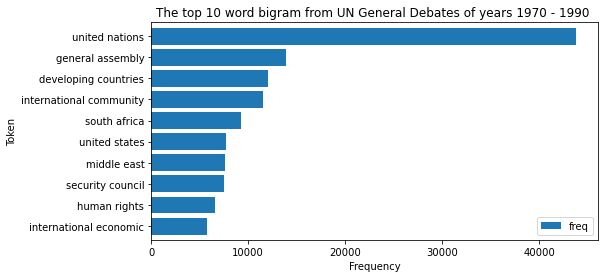

In [18]:
ax = freq_df_1970to1990.head(10).plot(kind='barh', width=0.8, figsize=(8,4))
ax.invert_yaxis()
ax.set(xlabel='Frequency', ylabel='Token', title='The top 10 word bigram from UN General Debates of years 1970 - 1990 ')

    จากกราฟจะได้ top 10 word bigram จากข้อมูล UN General Debates ช่วงปี 1970 ถึง 1990 ดังนี้  โดยมีคำว่า united nations อยู่อันดับที่ 1 
    และคำว่า international economic อยู่อันดับที่ 10

### -  หา top 10 word bigram จากข้อมูล UN General Debates ปี 1990 เป็นต้นไป

In [19]:
text_1990up = df.query("year >= 1990")
freq_df_1990up = count_words(text_1990up)

freq_df_1990up.head(10)

,freq
token,
united nations,61526
international community,16924
security council,14031
general assembly,13691
human rights,13654
developing countries,7023
member states,6037
sustainable development,5277
climate change,5158


[Text(0.5, 0, 'Frequency'),
 Text(0, 0.5, 'Token'),
 Text(0.5, 1.0, 'The top 10 word bigram from UN General Debates of years 1990 the Latest')]

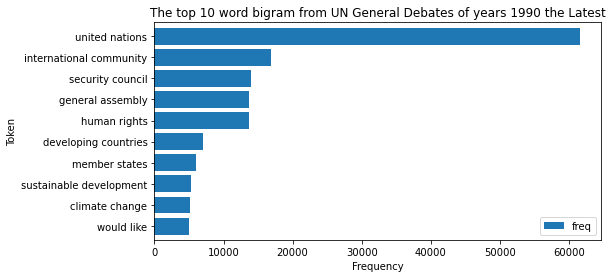

In [20]:
ax = freq_df_1990up.head(10).plot(kind='barh', width=0.8, figsize=(8,4))
ax.invert_yaxis()
ax.set(xlabel='Frequency', ylabel='Token', title='The top 10 word bigram from UN General Debates of years 1990 the Latest')

    จากกราฟจะได้ top 10 word bigram จากข้อมูล UN General Debates ปี 1990 เป็นต้นไป ดังนี้  โดยมีคำว่า united nations อยู่อันดับที่ 1 
    และคำว่า would like อยู่อันดับที่ 10

## 2. Create a bigram word cloud of the UN General Debates dataset of years 1970 - 1990 and 1990 to the latest (remove stopwords first)

In [21]:
def wordcloud(word_freq, title=None, max_words=200, stopwords=None):

    wc = WordCloud(width=800, height=400, 
                   background_color= "black", colormap="Paired", 
                   max_font_size=150, max_words=max_words)
    
    # convert data frame into dict
    if type(word_freq) == pd.Series:
        counter = Counter(word_freq.fillna(0).to_dict())
    else:
        counter = word_freq

    # filter stop words in frequency counter
    if stopwords is not None:
        counter = {token:freq for (token, freq) in counter.items() 
                              if token not in stopwords}
    wc.generate_from_frequencies(counter)
 
    plt.title(title) 

    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")

### -  สร้าง bigram word cloud จากข้อมูล UN General Debates dataset ช่วงปี 1970 ถึง 1990 

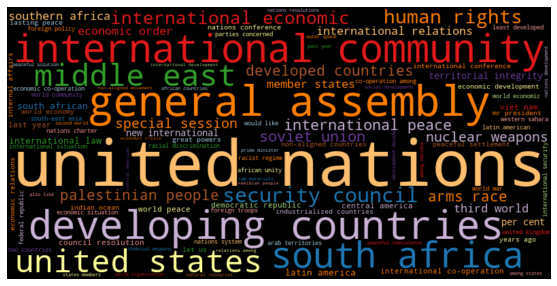

In [22]:
plt.figure(figsize=(15,5))
wordcloud(freq_df_1970to1990['freq'], max_words=100)

### - สร้าง bigram word cloud จากข้อมูล UN General Debates dataset ปี 1990 เป็นต้นไป

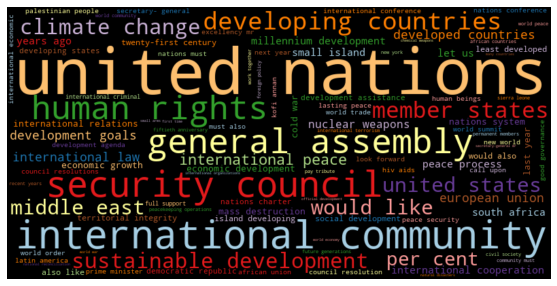

In [23]:
plt.figure(figsize=(15,5))
wordcloud(freq_df_1990up['freq'], max_words=100)

## 3. Create a trend graph showing the bigram and word trend of "climate change", "global warming" "wars" and 3 others of your choices

### - เตรียมข้อมูล total

In [24]:
df["total"] = df["tokens_ngrams"] + df["tokens_word"]

In [25]:
df.sample(5)

,session,year,country,country_name,speaker,position,text,tokens_ngrams,tokens_word,total
6697,66,2011,STP,Sao Tome and Principe,Manuel Salvador dos Ramos,Minister for Foreign Affairs,The Democratic Republic of Sao \nTome and Prin...,"[democratic republic, sao tome, principe joins...","[democratic, republic, sao, tome, principe, jo...","[democratic republic, sao tome, principe joins..."
4953,57,2002,NPL,Nepal,Arjon Jung Bahaur Singh,Minister for Foreign Affairs,﻿Let me begin by taking this\nopportunity to c...,"[unanimous election, fifty-seventh session, ge...","[let, begin, taking, opportunity, congratulate...","[unanimous election, fifty-seventh session, ge..."
1779,38,1983,MRT,Mauritania,OULD MINNIH,NaN,﻿\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\...,"[mr president, thirty-eighth session, general ...","[mr, president, presidency, thirty-eighth, ses...","[mr president, thirty-eighth session, general ..."
4079,52,1997,TKM,Turkmenistan,Boris Shikhmuradov,Deputy Prime Minister,"﻿Allow me to congratulate Mr. Udovenko,\nthe M...","[congratulate mr, mr udovenko, foreign affairs...","[allow, congratulate, mr, udovenko, minister, ...","[congratulate mr, mr udovenko, foreign affairs..."
3867,51,1996,NZL,New Zealand,Robin Gray,Minister for Foreign Affairs,﻿It gives me particular\npleasure to address t...,"[particular pleasure, general assembly, two co...","[gives, particular, pleasure, address, general...","[particular pleasure, general assembly, two co..."


    จะได้ Column ใหม่ที่ชื่อว่า total ขึ้นมา

### -  กำหนด Keywords ที่ใช้ในการสร้าง Trend Graph

In [27]:
keywords = ['climate change','global warming','wars','thai','world economy','disease']

    Keywords ที่กำหนดในการสร้าง Trend Graph มีดังนี้ climate change, global warming, wars, thai, world economy และ disease

### - สร้าง Trend Graph

In [28]:
def count_keywords(tokens, keywords):
    tokens = [t for t in tokens if t in keywords]
    counter = Counter(tokens)
    return [counter.get(k, 0) for k in keywords]

In [29]:
def count_keywords_by(df, by, keywords, column='total'):
    freq_matrix = df[column].apply(count_keywords, keywords=keywords)
    freq_df = pd.DataFrame.from_records(freq_matrix, columns=keywords)
    freq_df[by] = df[by]
    
    return freq_df.groupby(by).sum().sort_values(by)

In [30]:
freq_df = count_keywords_by(df, by='year', keywords = keywords)

In [31]:
freq_df

,climate change,global warming,wars,thai,world economy,disease
year,,,,,,
1970,0,0,38,1,4,11
1971,0,0,85,6,12,6
1972,0,0,88,4,8,22
1973,0,0,72,6,10,23
1974,0,0,70,2,54,27
1975,0,0,54,15,27,15
1976,0,0,55,3,33,26
1977,0,0,36,11,80,33
1978,0,0,67,5,75,35


<AxesSubplot:xlabel='year'>

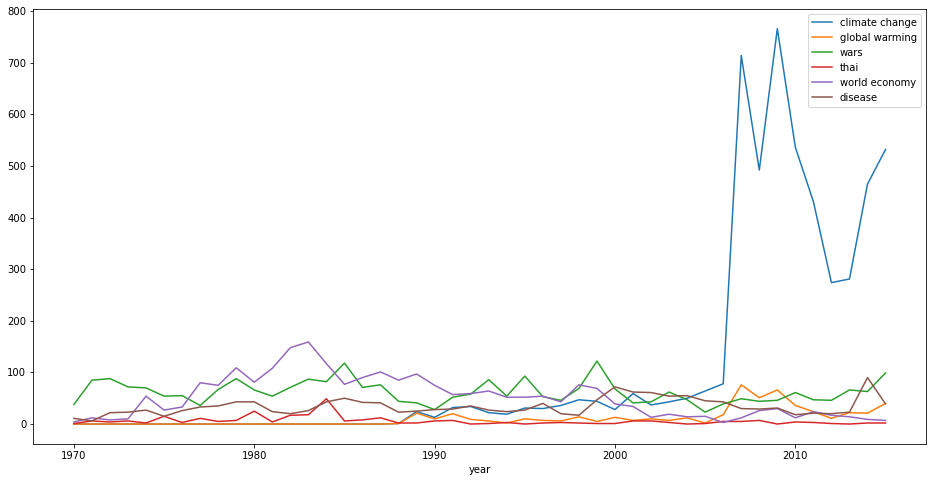

In [32]:
freq_df.plot(kind='line', figsize=(16,8))

    จะได้ Trend Graph ดังนี้ โดย ในปี 1970 จะมีการพูดถึง wars มากที่สุด ต่อมาปี 1980 จะมีการพูดถึง world economy มากที่สุด ต่อมา
    ในปี 1990 จะมีการพูดถึง world economy มากที่สุด ส่วนปี 2000 จะมีการพูดถึง world economy มากที่สุด และในปี 2010 จะมีการพูดถึง 
    climate change มากที่สุด

---